### Credits:

<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

This notebook is created by Zhuo Chen based on the notebooks created by [Nathan Kelber](http://nkelber.com) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
For questions/comments/improvements, email zhuo.chen@ithaka.org or nathan.kelber@ithaka.org<br />

Reused and modified for internal use at Università Cattolica del Sacro Cuore di Milano, by Deborah Grbac, email deborah.grbac@unicatt.it and Valentina Schiariti, email valentina.schiariti-collaboratore@unicatt.it, released under CC BY License.

This repository is founded on **Constellate notebooks**. The original Jupyter notebooks repository was designed by the educators at **ITHAKA's Constellate project**. The project was sunset on July 1, 2025. This current repository uses and resuses Constellate notebooks as Open Educational Resources (OER), free for re-use under a Creative Commons CC BY License.
___

# From a txt file available online to a wordcloud

**Word clouds** visualize textual data based on word frequency, where the size of each word reflects how often it appears in the text: larger words indicate higher frequency, while smaller words represent less frequent terms. This makes it easy to quickly identify the most important or recurring words in a document. 

In this lesson, we will use a **.txt file** that is available online and that we will download directly for our analysis; however, the same workflow can also be applied to any text file that you have imported from your own computer. 

(If you would like a quick recap on what a .txt file is—or on file types in general—you can review this here: [Python Intermediate 2](https://github.com/deborahgrbac/Introduction-to-Text-Analyisis-with-Python/blob/main/Python%20Notebooks/Python_Intermediate/python-intermediate-2.ipynb).)


Remember that to tokenize the text and to draw a word cloud first of all in your terminal you have to install nltk and wordcloud in your terminal.


**Terminal:** `pip install wordcloud` 


**Terminal:** `pip install nltk` 


## We start by tokenize the text, or reducing it to its basic elements (single words or tokens)

Remember that to tokenize the text and to create a word cloud, we have to run in the terminal the installation of nltk and wordcloud library:

**Terminal:** `pip install wordcloud` 
**Terminal:** `pip install nltk` 

or

In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Creating your own basic tokenizer

We can use the steps illustrated in the [tokenizers](https://github.com/deborahgrbac/Introduction-to-Text-Analyisis-with-Python/blob/main/Tokenization/tokenizers.ipynb) lesson to split a text into **tokens**. In the most most intuitive and basic way this means splitting the text on **whitespace** and **punctuation**. It is possible to create your own basic tokenizer by using Python string methods (the `.split()` method). 

The text that we will be using is an extract from Shakespeare's Othello, provided at this [link](https://www.folger.edu/explore/shakespeares-works/othello/read/) We can directly import this text through its URL thanks to the `urllib.request` library and store it in a `data` folder that we create.

In [3]:
import urllib.request
from pathlib import Path

# Step 1: Create a ./data folder if it doesn’t exist
data_folder = Path("./data/")
data_folder.mkdir(exist_ok=True)

# Step 2: Load the text file (in this case we upload the text directly form the Folger Shakespeare library website)
text_address = "https://folger-main-site-assets.s3.amazonaws.com/uploads/2022/11/othello_TXT_FolgerShakespeare.txt"
text_name = './data/' + text_address.rsplit('/', 1)[-1]
urllib.request.urlretrieve(text_address, text_name)

('./data/othello_TXT_FolgerShakespeare.txt',
 <http.client.HTTPMessage at 0x28944d7bd90>)

In [4]:
text_path = data_folder / "othello_TXT_FolgerShakespeare.txt"

if text_path.exists():
    print("File loaded successfully!")
else:
    print("File not found. Please download it and place it in the ./data/ folder.")

File loaded successfully!


In [6]:
# Opening a file in read mode
with open(text_path, "r") as f:
    othello_text_extract = f.read(1000) #reading an extract of the text
    print(othello_text_extract)

Othello
by William Shakespeare
Edited by Barbara A. Mowat and Paul Werstine
  with Michael Poston and Rebecca Niles
Folger Shakespeare Library
https://shakespeare.folger.edu/shakespeares-works/othello/
Created on May 11, 2016, from FDT version 0.9.2.1

Characters in the Play
OTHELLO, a Moorish general in the Venetian army
DESDEMONA, a Venetian lady
BRABANTIO, a Venetian senator, father to Desdemona
IAGO, Othello's standard-bearer, or "ancient"
EMILIA, Iago's wife and Desdemona's attendant
CASSIO, Othello's second-in-command, or lieutenant
RODERIGO, a Venetian gentleman
Duke of Venice
Venetian gentlemen, kinsmen to Brabantio:
  LODOVICO
  GRATIANO
Venetian senators
MONTANO, an official in Cyprus
BIANCA, a woman in Cyprus in love with Cassio
Clown, a comic servant to Othello and Desdemona
Gentlemen of Cyprus
Sailors
Servants, Attendants, Officers, Messengers, Herald, Musicians, Torchbearers.


ACT 1
=====

Scene 1
[Enter Roderigo and Iago.]


RODERIGO
Tush,


In [7]:
# Splitting the text string into a list of strings
extract_tokenized_list =  othello_text_extract.split()
list(extract_tokenized_list)

['Othello',
 'by',
 'William',
 'Shakespeare',
 'Edited',
 'by',
 'Barbara',
 'A.',
 'Mowat',
 'and',
 'Paul',
 'Werstine',
 'with',
 'Michael',
 'Poston',
 'and',
 'Rebecca',
 'Niles',
 'Folger',
 'Shakespeare',
 'Library',
 'https://shakespeare.folger.edu/shakespeares-works/othello/',
 'Created',
 'on',
 'May',
 '11,',
 '2016,',
 'from',
 'FDT',
 'version',
 '0.9.2.1',
 'Characters',
 'in',
 'the',
 'Play',
 '======================',
 'OTHELLO,',
 'a',
 'Moorish',
 'general',
 'in',
 'the',
 'Venetian',
 'army',
 'DESDEMONA,',
 'a',
 'Venetian',
 'lady',
 'BRABANTIO,',
 'a',
 'Venetian',
 'senator,',
 'father',
 'to',
 'Desdemona',
 'IAGO,',
 "Othello's",
 'standard-bearer,',
 'or',
 '"ancient"',
 'EMILIA,',
 "Iago's",
 'wife',
 'and',
 "Desdemona's",
 'attendant',
 'CASSIO,',
 "Othello's",
 'second-in-command,',
 'or',
 'lieutenant',
 'RODERIGO,',
 'a',
 'Venetian',
 'gentleman',
 'Duke',
 'of',
 'Venice',
 'Venetian',
 'gentlemen,',
 'kinsmen',
 'to',
 'Brabantio:',
 'LODOVICO',
 '

In [8]:
# Cleaning up the tokens
unigrams = []

for token in extract_tokenized_list:
    token = token.lower() # lowercase tokens
    token = token.replace('.', '') # remove periods
    token = token.replace('!', '') # remove exclamation points
    token = token.replace('?', '') # remove question marks
    unigrams.append(token)

In [9]:
# Load the NLTK stopwords list
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Remove stopwords
unigrams = [unigram for unigram in unigrams if unigram not in stop_words]

In [10]:
# Preview the unigrams
list(unigrams)

['othello',
 'william',
 'shakespeare',
 'edited',
 'barbara',
 'mowat',
 'paul',
 'werstine',
 'michael',
 'poston',
 'rebecca',
 'niles',
 'folger',
 'shakespeare',
 'library',
 'https://shakespearefolgeredu/shakespeares-works/othello/',
 'created',
 'may',
 '11,',
 '2016,',
 'fdt',
 'version',
 '0921',
 'characters',
 'play',
 '======================',
 'othello,',
 'moorish',
 'general',
 'venetian',
 'army',
 'desdemona,',
 'venetian',
 'lady',
 'brabantio,',
 'venetian',
 'senator,',
 'father',
 'desdemona',
 'iago,',
 "othello's",
 'standard-bearer,',
 '"ancient"',
 'emilia,',
 "iago's",
 'wife',
 "desdemona's",
 'attendant',
 'cassio,',
 "othello's",
 'second-in-command,',
 'lieutenant',
 'roderigo,',
 'venetian',
 'gentleman',
 'duke',
 'venice',
 'venetian',
 'gentlemen,',
 'kinsmen',
 'brabantio:',
 'lodovico',
 'gratiano',
 'venetian',
 'senators',
 'montano,',
 'official',
 'cyprus',
 'bianca,',
 'woman',
 'cyprus',
 'love',
 'cassio',
 'clown,',
 'comic',
 'servant',
 'ot

In [11]:
# Import Counter()
from collections import Counter

# Create a Counter object called `word_frequency`
word_frequency = Counter(unigrams)

## Create a Word Cloud to Visualize the Data
A visualization using the WordCloud library in Python. To learn more about customizing a wordcloud, [see the documentation](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). 

In [12]:
# For making wordclouds
from wordcloud import WordCloud
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import urllib

In [14]:
### Download cloud image for our word cloud shape ###
# It is not required to have a shape to create a word cloud
download_url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/sample_cloud.png'
urllib.request.urlretrieve(download_url, 'data/sample_cloud.png')
print('Cloud shape downloaded to data folder.')

Cloud shape downloaded to data folder.


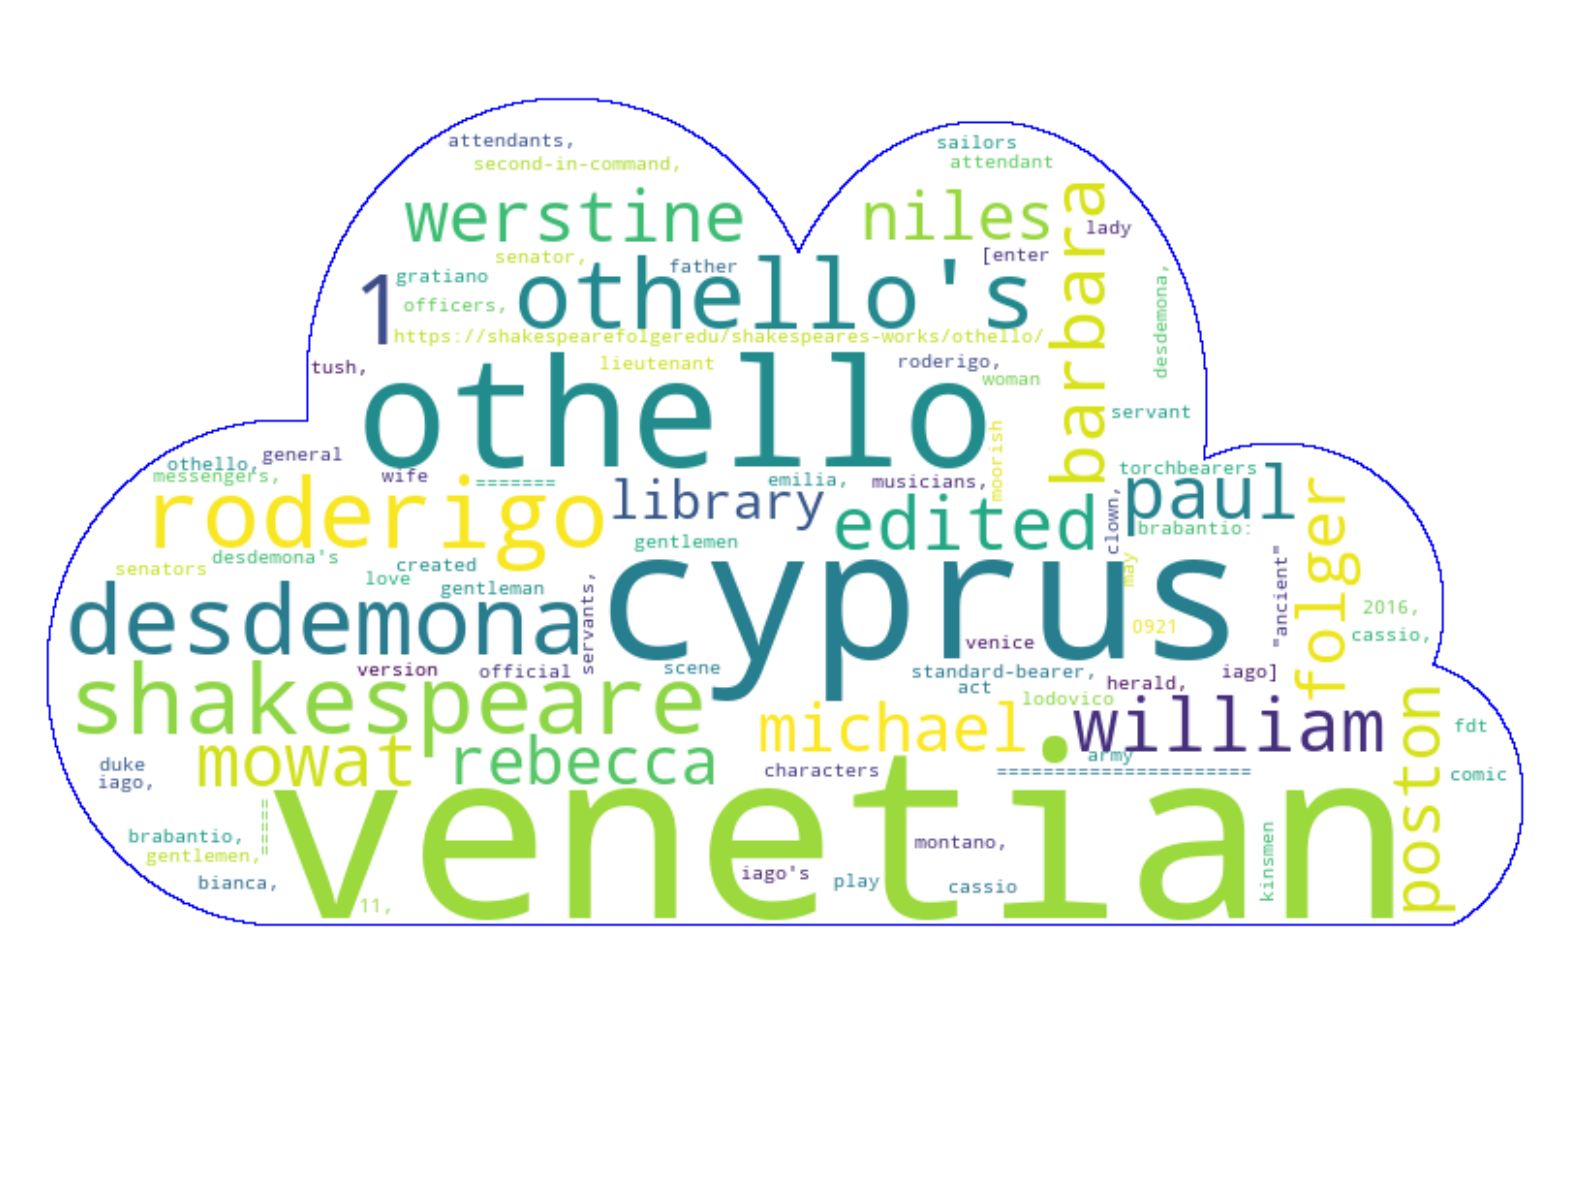

In [16]:
# Create a wordcloud from our data

# Adding a mask shape of a cloud to your word cloud
# By default, the shape will be a rectangle
# You can specify any shape you like based on an image file
cloud_mask = np.array(Image.open('data/sample_cloud.png')) # Specifies the location of the mask shape
cloud_mask = np.where(cloud_mask > 3, 255, cloud_mask) # this line will take all values greater than 3 and make them 255 (white)

### Specify word cloud details
wordcloud = WordCloud(
    width = 800, # Change the pixel width of the image if blurry
    height = 600, # Change the pixel height of the image if blurry
    background_color = "white", # Change the background color
    colormap = 'viridis', # The colors of the words, see https://matplotlib.org/stable/tutorials/colors/colormaps.html
    max_words = 150, # Change the max number of words shown
    min_font_size = 4, # Do not show small text
    
    # Add a shape and outline (known as a mask) to your wordcloud
    contour_color = 'blue', # The outline color of your mask shape
    mask = cloud_mask, # 
    contour_width = 1
).generate_from_frequencies(word_frequency)

mpl.rcParams['figure.figsize'] = (20,20) # Change the image size displayed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# Print the most common processed unigrams and their counts
for gram, count in word_frequency.most_common(25):
    print(gram.ljust(20), count)

venetian             6
cyprus               3
othello              2
shakespeare          2
desdemona            2
othello's            2
1                    2
roderigo             2
william              1
edited               1
barbara              1
mowat                1
paul                 1
werstine             1
michael              1
poston               1
rebecca              1
niles                1
folger               1
library              1
https://shakespearefolgeredu/shakespeares-works/othello/ 1
created              1
may                  1
11,                  1
2016,                1
